In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression

# Suitable for classification : Linear vs Logistic

## Demonstrate Sigmoid Function

In [2]:
# Define Sigmoid Function
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

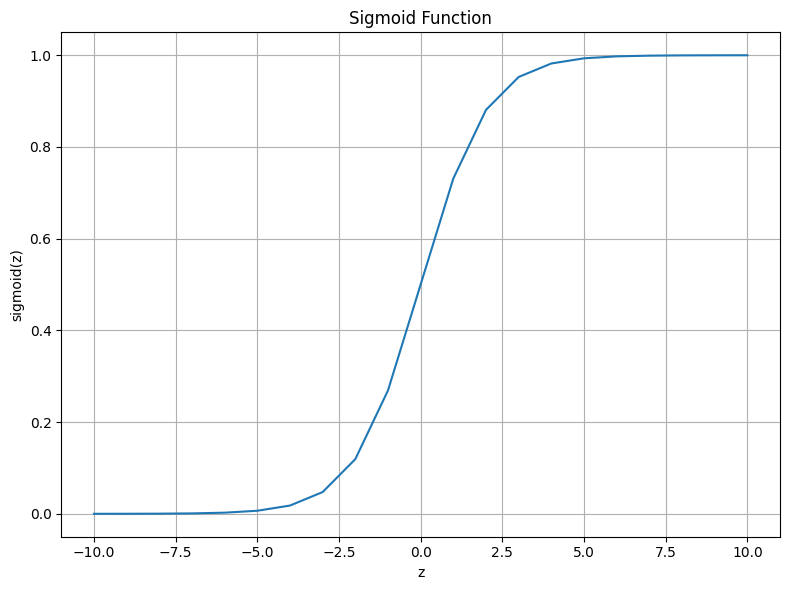

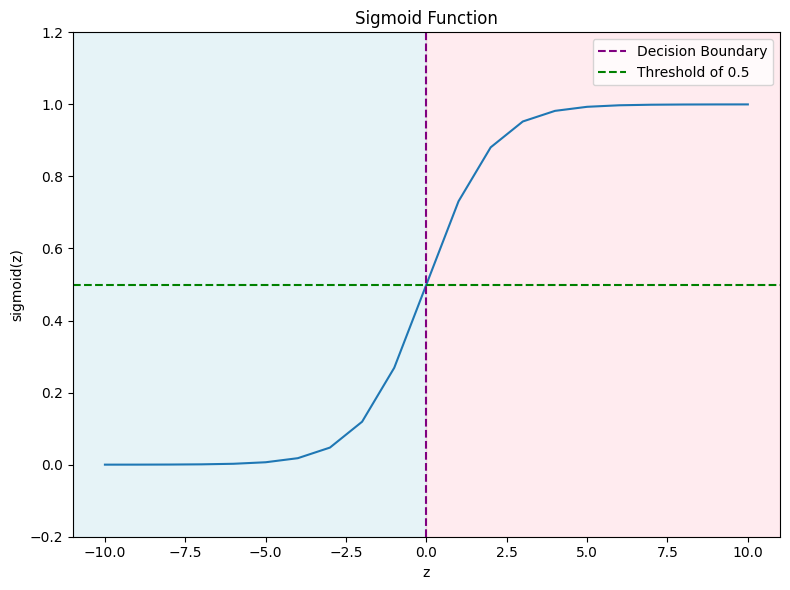

In [3]:
# Visualize Sigmoid Function
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

z = np.arange(-10, 11)
g = sigmoid(z)

fig, ax = plt.subplots(1, 1, figsize = (8, 6))
ax.plot(z, g)
ax.set_title('Sigmoid Function')
ax.set_xlabel('z')
ax.set_ylabel('sigmoid(z)')
ax.grid(True)

plt.tight_layout()
plt.savefig('figures/os_01_01.png')
plt.show()

fig, ax = plt.subplots(1, 1, figsize = (8, 6))
ax.plot(z, g)
ax.set_title('Sigmoid Function')
ax.set_xlabel('z')
ax.set_ylabel('sigmoid(z)')
ax.axvline(0, color = 'purple', linestyle = '--', label = 'Decision Boundary')
ax.axhline(0.5, color = 'green', linestyle = '--', label = 'Threshold of 0.5')
ax.set_ylim(-0.2, 1.2)
ax.set_xlim(np.min(z) - 1, np.max(z) + 1)
ax.fill_betweenx(y=[-0.2, 1.2], x1=np.min(z) - 1, x2=0, color='lightblue', alpha=0.3)
ax.fill_betweenx(y=[-0.2, 1.2], x1=0, x2=np.max(z) + 1, color='pink', alpha=0.3)
ax.legend()

plt.tight_layout()
plt.savefig('figures/os_01_02.png')
plt.show()

## Outlier Sensitivity Comparison btw Linear Regression and Sigmoid Function

In [4]:
# Define Linear & Logistic Function
def try_linear(x, y, threshold, save_file):
    w_in = np.zeros((1))
    b_in = 0
    pos = y == 1
    neg = y == 0

    sgdr = SGDRegressor()
    sgdr.fit(x, y, w_in, b_in)
    coef = sgdr.coef_[0]
    intercept = sgdr.intercept_[0]
    x_db = (threshold - intercept) / coef

    fig, ax = plt.subplots(1, 1, figsize = (8, 6))
    ax.scatter(x[pos, 0], y[pos], marker = 'o', color = 'r', label = 'y = 1')
    ax.scatter(x[neg, 0], y[neg], marker = 'x', label = 'y = 0')
    ax.plot(x, x * coef + intercept, color = 'r')
    ax.axvline(x_db, color = 'purple', linestyle = '--', label = 'Decision Boundary')
    ax.axhline(threshold, color = 'green', linestyle = '--', label = 'Threshold of 0.5')
    ax.set_ylim(-0.05, 1.05)
    ax.set_xlim(np.min(x) - 1, np.max(x) + 1)
    ax.fill_betweenx(y = [-0.2, 1.2], x1 = np.min(x) - 1, x2 = x_db, color='lightblue', alpha=0.3)
    ax.fill_betweenx(y = [-0.2, 1.2], x1 = x_db, x2 = np.max(x) + 1, color='pink', alpha=0.3)
    ax.legend()

    plt.tight_layout()
    plt.savefig('figures/os_{}.png'.format(save_file))
    plt.show()
    return

def try_sigmoid(x, y, threshold, save_file):
    pos = y == 1
    neg = y == 0

    lr = LogisticRegression()
    lr.fit(x, y)
    coef = lr.coef_[0]
    intercept = lr.intercept_[0]
    x_db = (np.log(1 / threshold  - 1) - intercept) / coef

    x_range = np.arange(np.min(x), np.max(x), 0.5)
    y_result = sigmoid(x_range * coef + intercept)

    fig, ax = plt.subplots(1, 1, figsize = (8, 6))
    ax.scatter(x[pos, 0], y[pos], marker = 'o', color = 'r', label = 'y = 1')
    ax.scatter(x[neg, 0], y[neg], marker = 'x', label = 'y = 0')
    ax.plot(x_range, y_result)
    ax.axvline(x_db, color = 'purple', linestyle = '--', label = 'Decision Boundary')
    ax.axhline(threshold, color = 'green', linestyle = '--', label = 'Threshold of 0.5')
    ax.set_ylim(-0.05, 1.05)
    ax.set_xlim(np.min(x) - 1, np.max(x) + 1)
    ax.fill_betweenx(y = [-0.2, 1.2], x1 = np.min(x) - 1, x2 = x_db, color='lightblue', alpha=0.3)
    ax.fill_betweenx(y = [-0.2, 1.2], x1 = x_db, x2 = np.max(x) + 1, color='pink', alpha=0.3)
    ax.legend()

    plt.tight_layout()
    plt.savefig('figures/os_{}.png'.format(save_file))
    plt.show()
    return

In [5]:
# Generate Datasets for Comparison
x_compact = np.array([0., 1, 2, 3, 4, 5]).reshape(-1, 1)
y_compact = np.array([0, 0, 0, 1, 1, 1])

x_outlier = np.array([0., 1, 2, 3, 4, 5, 15]).reshape(-1, 1)
y_outlier = np.array([0, 0, 0, 1, 1, 1, 1])

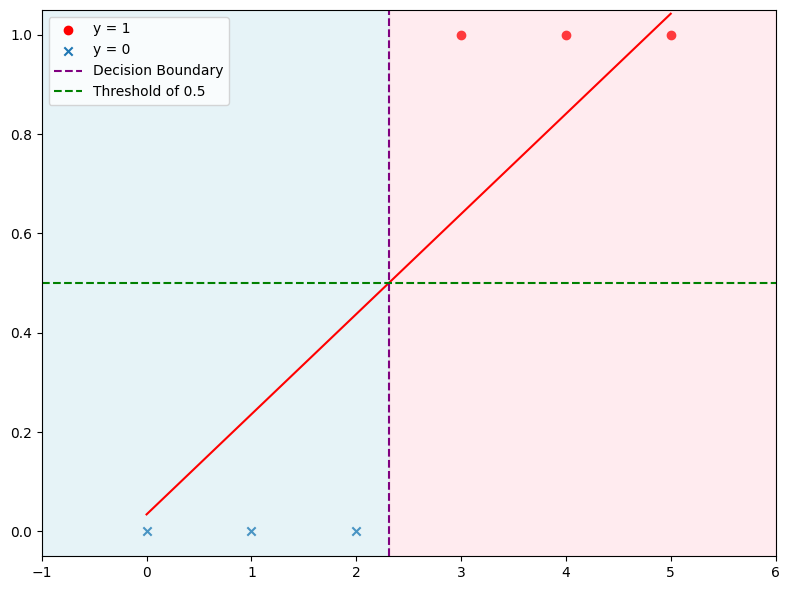

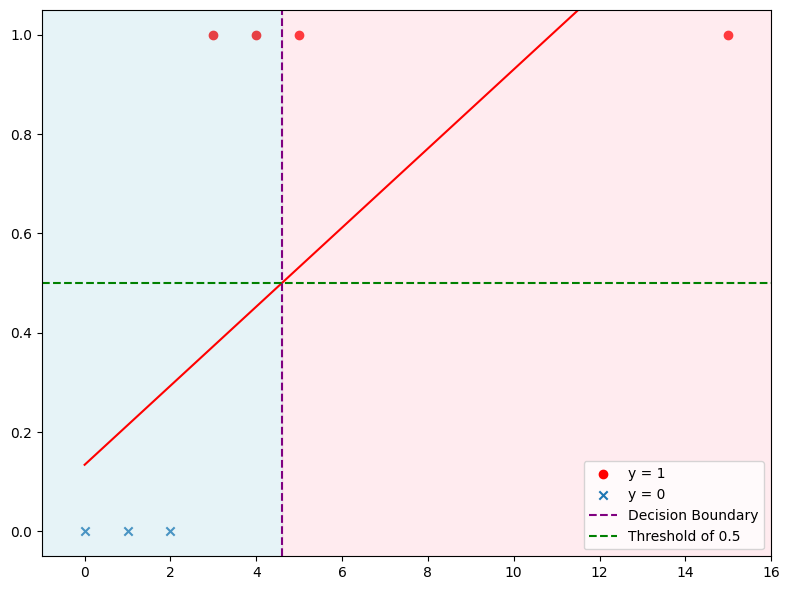

In [6]:
# Outlier Sensitivity of Linear Regression
try_linear(x_compact, y_compact, 0.5, '02')
try_linear(x_outlier, y_outlier, 0.5, '03')

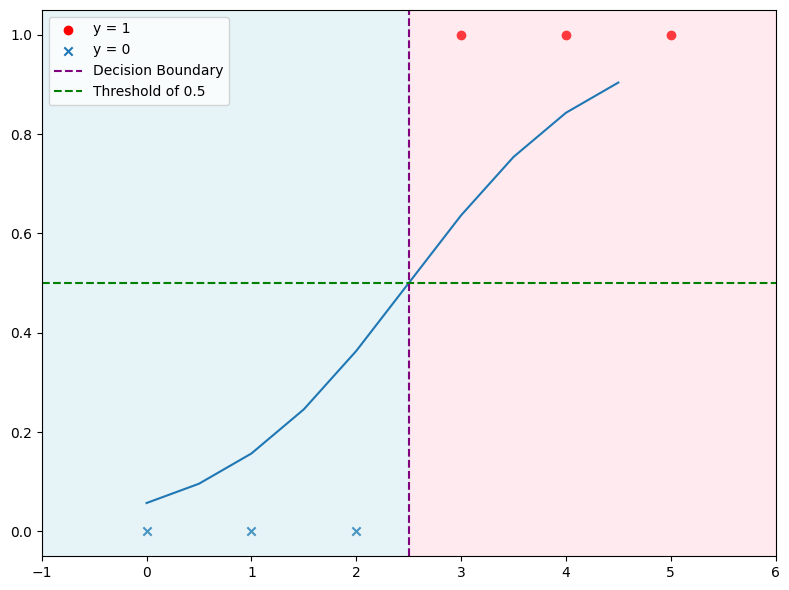

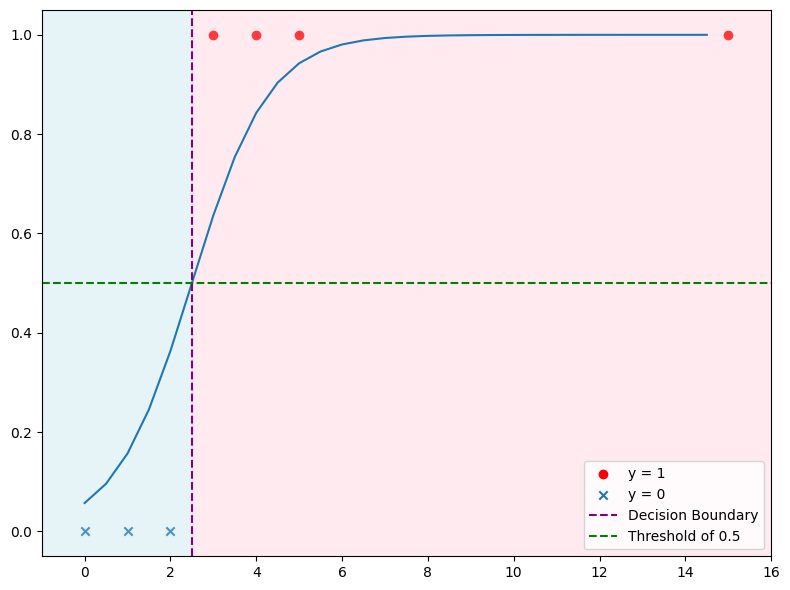

In [7]:
# Outlier Sensitivity of Logisitic Regression
try_sigmoid(x_compact, y_compact, 0.5, '04')
try_sigmoid(x_outlier, y_outlier, 0.5, '05')